# Лабараторая работа № 1

## Описание датасета

**предметная область**: описание подержанных автомобилей выставленных на продажу

**источник датасета**: [https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv)

**характер данных**: реальный

**атрибуты**:

**Make**: Хранит в себе название производителя автомабиля, тип: строковый. Характеристика высокой важности //

**Model**: Хранит в себе название модели автомабиля, тип: строковый. Характеристика среденей важности /

**Price**: Хранит в себе цену на данных автомабиль, тип: int64. Характеристика высокой важности

**Year**: Хранит в себе год выпуска автомобиля, тип: int64. Характеристика высокой важности

**Kilometer**: Хранит в себе пробег автомобиля, тип: int64. Характеристика высокой важности

**Fuel Type**: Хранит в себе название топлива автомобиля, тип: строковый. Характеристика высокой важности

**Transmission**: Хранит в тип коробки предач автомабиля, тип: строковый. Характеристика высокой важности

**Location**: Хранит в себе местоположение автомабиля, тип: строковый. Характеристика среденей важности

**Color**: Хранит в себе цвет автомабиля, тип: строковый. Характеристика низкой важности

**Owner**: Хранит в количество владельцев автомабиля, тип: строковый. Характеристика средней важности

**Seller Type**: Хранит в себе тип продавца автомабиля(коменрческий/частник), тип: строковый. Характеристика средней важности

**Drivetrain**: Хранит в себе тип трансмисии автомабиля, строковый. Характеристика средней важности

**Length**: Хранит в себе длину автомабиля, тип: int64. Характеристика средней важности

**Width**: Хранит в себе ширину автомабиля, тип: int64. Характеристика средней важности

**Height**: Хранит в себе высоту автомабиля, тип: int64. Характеристика средней важности

**Seating Capacity**: Хранит в себе количество посадочных мест в автомабиле, тип: int64. Характеристика низкой важности 

**Fuel Tank Capacity**: Хранит в себе вместительность топливного бака автомабиль, . Характеристика средней важности

In [78]:
!pip install matplotlib.

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()

Пример данных

In [13]:
df1 = pd.read_csv('car details v4.csv')
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2059 non-null   int64  
 1   Make                2059 non-null   object 
 2   Model               2059 non-null   object 
 3   Price               2059 non-null   int64  
 4   Year                2059 non-null   int64  
 5   Kilometer           2059 non-null   int64  
 6   Fuel Type           2059 non-null   object 
 7   Transmission        2059 non-null   object 
 8   Location            2059 non-null   object 
 9   Color               2059 non-null   object 
 10  Owner               2059 non-null   object 
 11  Seller Type         2059 non-null   object 
 12  Drivetrain          1923 non-null   object 
 13  Length              1995 non-null   float64
 14  Width               1995 non-null   float64
 15  Height              1995 non-null   float64
 16  Seatin

,Unnamed: 0,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,RWD,4735.0,1830.0,1795.0,7.0,55.0


## Анализ для числовых данных(выявление выбрасов)

In [222]:
def std_dev(column, name):
    print(name)
    print('Средняя: ' + str(column.mean()))
    print('СКО: ' + str(np.std(column)))

def histogram(column, name, y_title, is_log_scale):
    print('Гистрограмма')
    # plt.figure(figsize=(10, 5))
    # plt.hist(df['Age'], bins=30);
    # plt.grid(True)
    # plt.title('Age distribution');
    ax = sns.histplot(column, edgecolor='w', bins=30, log_scale=is_log_scale)

    #вычисляем первый квартиль, третий, межквартальный размах, на основе их - верхнюю и нижнюю границу, если вышел из диапозона - выброс
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1;
    upper_boundary = Q3 + (1.5 * IQR);
    lower_boundary = Q1 - (1.5 * IQR);

    outliers = column[(column > upper_boundary) | (column < lower_boundary)]

    #указываем на первый возможный выброс (только на один, иначе будет лишнее награмождение)
    #for index in range(0, len(outliers)):
    if not outliers.empty:
        plt.annotate(
            'Первый возможный выброс', 
            xy=(outliers.iloc[0], 0.5), 
            xytext=(outliers.iloc[0] + 10, 100), 
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2),
            bbox=dict(boxstyle="round", fc="0.8")
        )
    
    # plt.xticks(fontsize=14)
    # plt.yticks(fontsize=14)
    plt.xlabel(name, fontsize=14)
    plt.ylabel(y_title, fontsize=14)
    plt.title(name, fontsize=20);
    
def atribut_statistic(column, name, y_title = 'Количество', is_log_scale = False):
    std_dev(column, name)
    histogram(column, name, y_title, is_log_scale)
    print('Количесво пропущенных значений: ' + str(column.isnull().sum()))

Цена
Средняя: 1702991.6964545897
СКО: 2419292.9291388267
Гистрограмма
Количесво пропущенных значений: 0


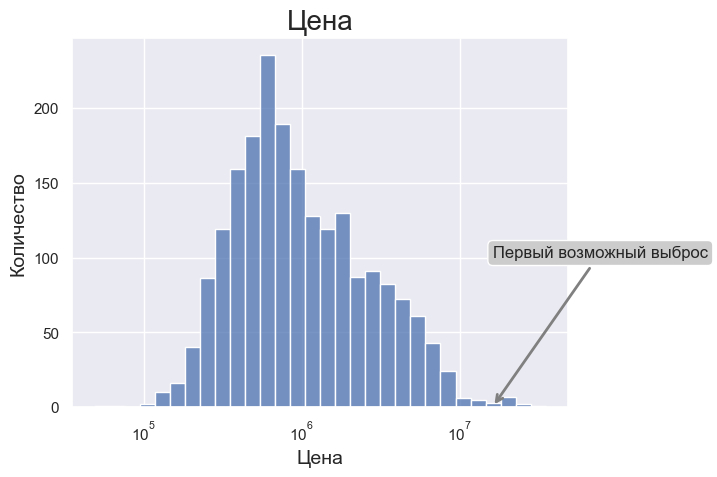

In [223]:
atribut_statistic(df1['Price'], 'Цена', 'Количество', True)

Год
Средняя: 2016.4254492472073
СКО: 3.3627466903227354
Гистрограмма
Количесво пропущенных значений: 0


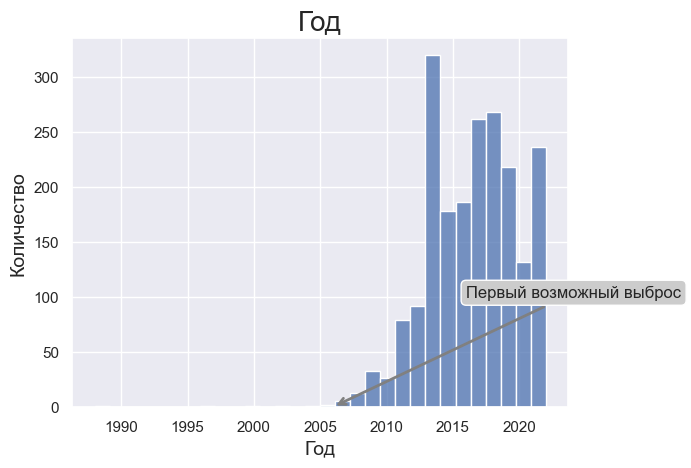

In [214]:
atribut_statistic(df1['Year'], 'Год')

Пробег
Средняя: 54224.714424477905
СКО: 57347.79011283419
Гистрограмма
Количесво пропущенных значений: 0


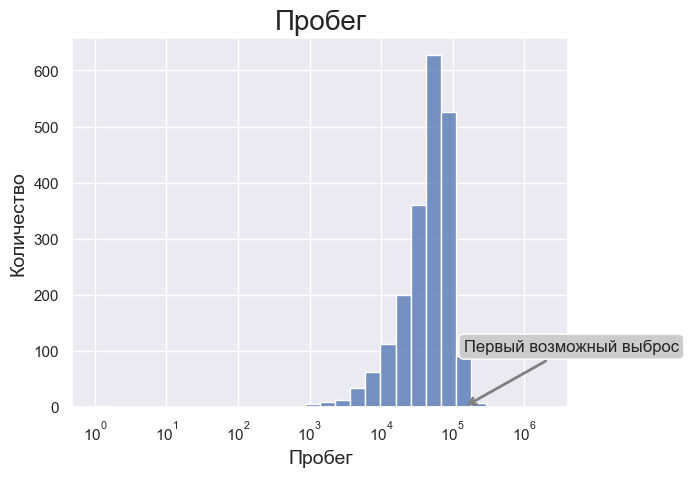

In [215]:
atribut_statistic(df1['Kilometer'], 'Пробег', is_log_scale=True)

Длина
Средняя: 4280.860651629073
СКО: 442.3476010231136
Гистрограмма
Количесво пропущенных значений: 64


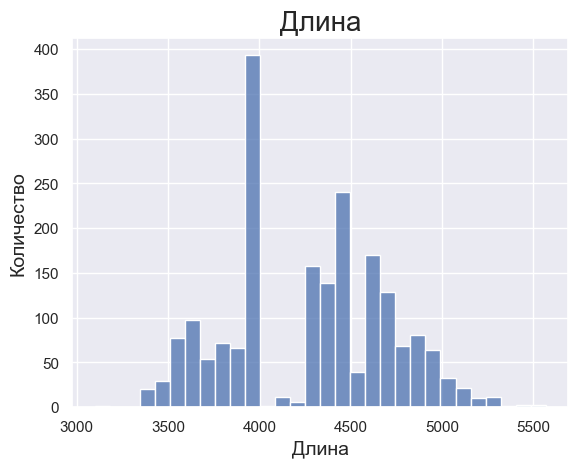

In [216]:
atribut_statistic(df1['Length'], 'Длина')

У данного атрибута пропущена 64 элемента, исходя из того, что количество элементво в датасете = 2059. Данные строки - можно просто исключить

Ширина
Средняя: 1767.9919799498746
СКО: 135.2319197383884
Гистрограмма
Количесво пропущенных значений: 64


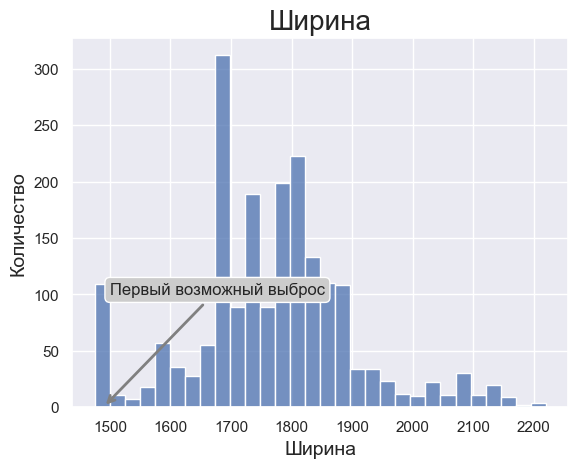

In [217]:
atribut_statistic(df1['Width'], 'Ширина')

У данного атрибута пропущена 64 элемента, исходя из того, что количество элементво в датасете = 2059. Данные строки - можно просто исключить

Высота
Средняя: 1591.7353383458646
СКО: 136.03984794867296
Гистрограмма
Количесво пропущенных значений: 64


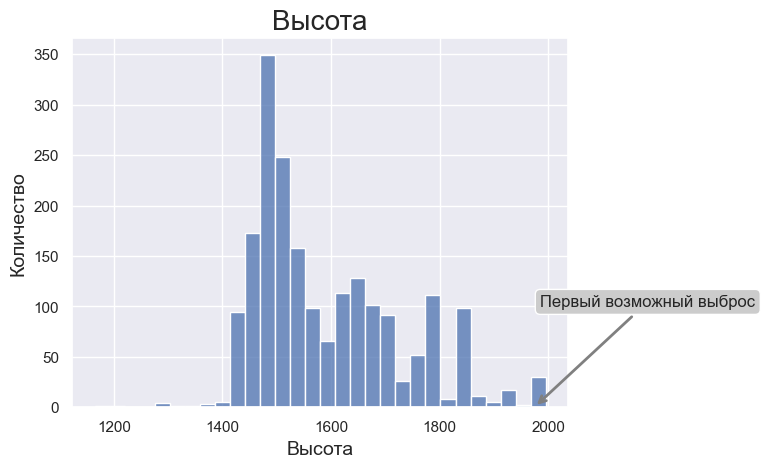

In [218]:
atribut_statistic(df1['Height'], 'Высота')

У данного атрибута пропущена 64 элемента, исходя из того, что количество элементво в датасете = 2059. Данные строки - можно просто исключить

Количество мест
Средняя: 5.306265664160401
СКО: 0.8219640514363336
Гистрограмма
Количесво пропущенных значений: 64


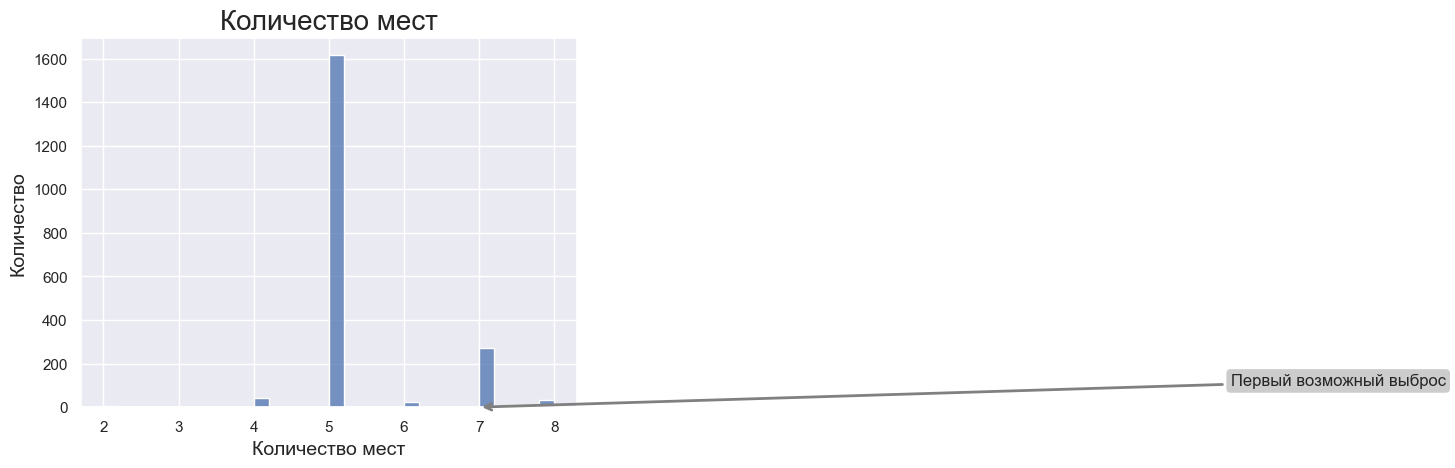

In [219]:
atribut_statistic(df1['Seating Capacity'], 'Количество мест')

У данного атрибута пропущена 64 элемента, исходя из того, что количество элементво в датасете = 2059. Данные строки - можно просто исключить

Емкость топливного бака
Средняя: 52.00220966084276
СКО: 15.10631492168366
Гистрограмма
Количесво пропущенных значений: 113


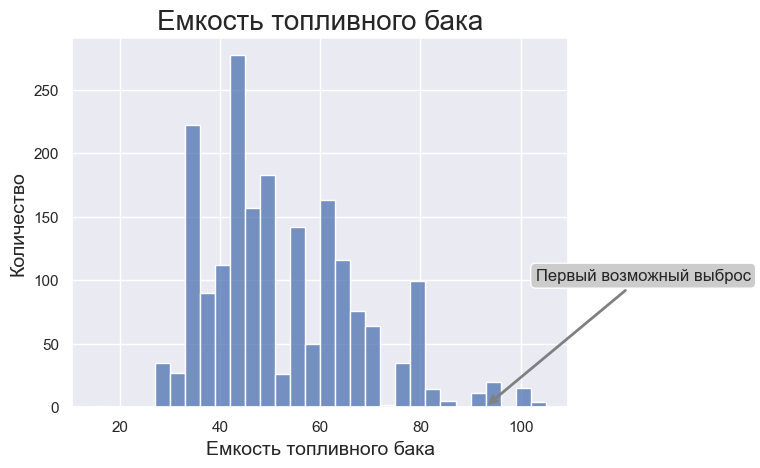

In [220]:
atribut_statistic(df1['Fuel Tank Capacity'], 'Емкость топливного бака')

У данного атрибута пропущена 113 элемента, исходя из того, что количество элементво в датасете = 2059. Данные строки - можно просто исключить

## Анализ для текстовых данных

Посколько обработка текстовых данных скуднее, чем числовых - выведем процентное содержание самых популярных значений для каждой из колонок

In [299]:
def text_atribut_statistic(column, name, pd):
    print(f'Атрибут: {name}')
    statistic = column.value_counts(normalize=True) * 100
    if (statistic.size > 3):
        with_name = statistic.head(3)
        other = pd.Series({'другие': 100 - with_name.sum()})
        statistic = pd.concat([with_name, other])
    result = statistic.round(2).astype(str) + '%'
    print(result)

In [303]:
text_atribut_statistic(df1['Make'], 'Марка', pd)

Атрибут: Марка
Maruti Suzuki    21.37%
Hyundai          16.95%
Mercedes-Benz     8.31%
другие           53.38%
dtype: object


In [271]:
def unique_count(column, name):
    print(f'У атрибута {name} - {column.unique().size} уникальных значений')

In [302]:
unique_count(df1['Model'], 'Модель')

У атрибута Модель - 1050 уникальных значений


In [301]:
text_atribut_statistic(df1['Fuel Type'], 'Топливо', pd)

Атрибут: Топливо
Diesel    50.95%
Petrol    45.75%
CNG        2.43%
другие     0.87%
dtype: object


In [304]:
text_atribut_statistic(df1['Transmission'], 'Коробка передач', pd)

Атрибут: Коробка передач
Transmission
Manual       55.03%
Automatic    44.97%
Name: proportion, dtype: object


In [305]:
text_atribut_statistic(df1['Location'], 'Местоположение', pd)

Атрибут: Местоположение
Mumbai    16.61%
Delhi     14.91%
Pune       6.99%
другие    61.49%
dtype: object


In [306]:
text_atribut_statistic(df1['Color'], 'Цвет', pd)

Атрибут: Цвет
White     38.95%
Silver    13.84%
Grey      10.68%
другие    36.52%
dtype: object


In [308]:
text_atribut_statistic(df1['Seller Type'], 'Количество владельцев', pd)

Атрибут: Количество владельцев
Seller Type
Individual                 96.99%
Corporate                   2.77%
Commercial Registration     0.24%
Name: proportion, dtype: object


In [310]:
text_atribut_statistic(df1['Owner'], 'Какой по счёту продавец', pd)

Атрибут: Какой по счёту продавец
First     78.63%
Second    18.12%
Third      2.04%
другие     1.21%
dtype: object


In [311]:
text_atribut_statistic(df1['Drivetrain'], 'Трансмиссия', pd)

Атрибут: Трансмиссия
Drivetrain
FWD    69.16%
RWD    16.69%
AWD    14.14%
Name: proportion, dtype: object


## Удалить выбросы и дубли, обработать пропущенные значения

### Выбросы

В предыдущем пункте работе была написана функция для визуализации первого выброса, изменим таки образом, чтобы она удалала все выбросы.

In [14]:
def delete_blowouts(df, column):
    # вычисляем первый квартиль, третий, межквартальный размах, на основе их - верхнюю и нижнюю границу
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + (1.5 * IQR)
    lower_boundary = Q1 - (1.5 * IQR)

    # Если вышел из диапозона - выброс
    outliers = df[column][(df[column] > upper_boundary) | (df[column] < lower_boundary)]
    # удаление выбрасов
    print(f'Количество элементов до удаления выбросов: {df["Price"].count()}')
    df.drop(outliers.keys(), inplace=True)
    print(f'После: {df["Price"].count()}')

In [15]:
df = df1

In [16]:
delete_blowouts(df, 'Price')

Количество элементов до удаления выбросов: 2059
После: 1844


In [17]:
delete_blowouts(df, 'Year')

Количество элементов до удаления выбросов: 1844
После: 1831


In [18]:
delete_blowouts(df, 'Kilometer')

Количество элементов до удаления выбросов: 1831
После: 1791


In [19]:
delete_blowouts(df, 'Length')

Количество элементов до удаления выбросов: 1791
После: 1790


In [20]:
delete_blowouts(df, 'Width')

Количество элементов до удаления выбросов: 1790
После: 1622


In [21]:
delete_blowouts(df, 'Height')

Количество элементов до удаления выбросов: 1622
После: 1566


In [22]:
delete_blowouts(df, 'Seating Capacity')

Количество элементов до удаления выбросов: 1566
После: 1330


In [23]:
delete_blowouts(df, 'Fuel Tank Capacity')

Количество элементов до удаления выбросов: 1330
После: 1295


### Дубли

In [25]:
first_count = len(df)
df = df.drop_duplicates()
second_count = len(df)
coutn_del_rows = first_count - second_count
print(f'В датасете {len(df)} строк')
print(f'В датасете было обнаружено и удалено {coutn_del_rows} дублей') if (coutn_del_rows != 0) else print(f'В датасете не было обнаружено дубликатов')

В датасете 1295 строк
В датасете не было обнаружено дубликатов


### Обработка пропущенных значений

In [26]:
df = df.dropna()
print(f'Количество строк после обработки пропущенных значений: {len(df)}')

Количество строк после обработки пропущенных значений: 1196


## Подготовка датасета

Какой атрибут выступит в роли целевого класса? Создадим ещё один атрибут, чтобы получить бинарную классификацию - 'Price Type' со значениями "expensive" and "cheap". Будем прогназировать по характеристикам (марка машины, год выпуска, тип двигателя) - дорогой автомобить или дешёвый.

Пусть Дорогой автомобить от дешёвого отличает граница 1 000 000 👀

In [32]:
def text_atribut_statistic(column, name, pd):
    print(f'Атрибут: {name}')
    statistic = column.value_counts(normalize=True) * 100
    if (statistic.size > 3):
        with_name = statistic.head(3)
        other = pd.Series({'другие': 100 - with_name.sum()})
        statistic = pd.concat([with_name, other])
    result = statistic.round(2).astype(str) + '%'
    print(result)

In [33]:
df['Price Type'] = np.where(df['Price'] >= 1000000, 'expensive', 'cheap')
text_atribut_statistic(df['Price Type'], 'Тип цены', pd)

Атрибут: Тип цены
Price Type
cheap        70.74%
expensive    29.26%
Name: proportion, dtype: object


### Подготовка

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [36]:
from sklearn.model_selection import train_test_split

#преобразуем данные к числовому виду ('Make', 'Fuel Type')
label_encoder_make = LabelEncoder()
df['Make'] = label_encoder_make.fit_transform(df['Make'])

label_encoder_price = LabelEncoder()
df['Fuel Type'] = label_encoder_price.fit_transform(df['Price Type'])

#преобразование целевого класса
label_encoder_price = LabelEncoder()
train_labels = label_encoder_price.fit_transform(df['Price Type'])

train_data = df[['Year', 'Make', 'Kilometer', 'Fuel Type']].values

#разбиваем на данные для обучения модели и для теста 80:20
data_train, data_test, labels_train, labels_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

### Дерево решений

In [37]:
from sklearn.tree import DecisionTreeClassifier

#создание модели
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

# обучение
clf_tree.fit(data_train, labels_train)

# Прогноз
forecast_tree = clf_tree.predict(data_test)

### kNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

#создание
knn = KNeighborsClassifier(n_neighbors=5)

#обучение
knn.fit(data_train, labels_train)

#прогнозирование
forecast_knn = knn.predict(data_test)

## Оценка полученных результатов

In [39]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

#дерево решений
accuracy_tree = accuracy_score(labels_test, forecast_tree)
precision_tree = precision_score(labels_test, forecast_tree, average='weighted')
recall_tree = recall_score(labels_test, forecast_tree, average='weighted')
f_measure_tree = f1_score(labels_test, forecast_tree, average='weighted')

In [40]:
#kNN
accuracy_knn = accuracy_score(labels_test, forecast_knn)
precision_knn = precision_score(labels_test, forecast_knn, average='weighted')
recall_knn = recall_score(labels_test, forecast_knn, average='weighted')
f_measure_knn = f1_score(labels_test, forecast_knn, average='weighted')

In [41]:
print("Характеристики для Дерева решений")
print(f"Accuracy: {accuracy_tree}")
print(f"Precision: {precision_tree}")
print(f"Recall: {recall_tree}")
print(f"F measure: {f_measure_tree}")

print("Характеристики для Knn")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F measure: {f_measure_knn}")

Характеристики для Дерева решений
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F measure: 1.0
Характеристики для Knn
Accuracy: 0.625
Precision: 0.5859644087256027
Recall: 0.625
F measure: 0.5789951573849879


## Вывод

В ходе проделанной мною работы был очищен датасет. Добавлен атрибут, который стал целевым классом. Данные были разбиты на 2 выборки. Модели обучены и применены. Что касается оценки работы данных моделей - дерево решений показало себя идеально, оно однозначно прогнозировало тип цены машины в датасете. Доля правильных ответов, точность, полнота и баланс между Precision и Recall в kNN - гораздо ниже. Дело в том, что она чувствительна и хорошо работает на небольших датасетах. В то время, как специализация дерева решений - большие.